# Demonstration Notebook


# Imports

In [1]:
import collections
import datetime

import tensorflow as tf
import h5py
from scipy.io import loadmat

import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
import os
import h5sparse
import datetime
import logging

from scipy import stats

from scipy.sparse import coo_matrix, vstack
from epitome.functions import *
from epitome.models import *
import datetime
import sys
import scipy.stats as stats
import yaml
import h5py

# Load Data

In [3]:
with open('/home/eecs/akmorrow/epitome/config.yml') as f:
    config = yaml.safe_load(f)
config

{'epitome_data_dir': '/home/eecs/akmorrow/epitome/data/EPITOME_DATA/',
 'deepsea_data_path': '/data/akmorrow/deepsea_data_numpy/deepsea_labels_train/'}

In [4]:

train_data, valid_data, test_data = load_epitome_data(config['epitome_data_dir'])


In [5]:
# train_data, valid_data, test_data = load_epitome_data(config['epitome_data_dir'])
data = {Dataset.TRAIN: train_data, Dataset.VALID: valid_data, Dataset.TEST: test_data}
print(data[Dataset.TRAIN].shape, data[Dataset.VALID].shape, data[Dataset.TEST].shape)


(1279, 2787878) (1279, 187696) (1279, 293266)


# Validation and Test Cell Types

## Get matrix of cell types and assays

In [6]:
assays = ['DNase', 'ZZZ3', 'ZNF274', 'ZBTB7A', 'ZBTB33', 'YY1', 'USF2', 'TEAD4', 'TCF7L2', 'TCF12', 'TBP', 'TAF1', 'STAT5A', 'STAT3', 'STAT1', 'SRF', 'SP2', 'SP1', 'SMC3', 'SIX5', 'RXRA', 'RFX5', 'POU2F2', 'PML', 'NFIC', 'MEF2A', 'MAZ', 'IRF3', 'HDAC2', 'GTF2F1', 'FOXA1', 'FOSL2', 'EZH2', 'ETS1', 'ELK1', 'ELF1', 'E2F6', 'E2F4', 'CTCF', 'CHD2', 'CHD1', 'CEBPB', 'BRCA1', 'BHLHE40', 'BCLAF1', 'BCL3', 'ATF3', 'ARID3A']

cells = ['MCF-7', 'K562', 'HepG2', 'HeLa-S3', 'GM12892', 'GM12891', 'GM12878', 'A549']

print(len(cells), len(assays))

8 48


48 8


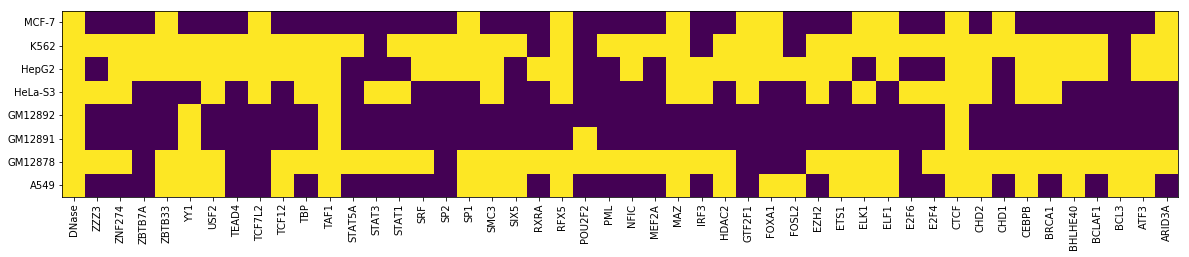

In [7]:
matrix, cellmap, assaymap = get_assays_from_feature_file(EPITOME_FEATURE_NAME_FILE,
                                  eligible_assays = assays,
                                  eligible_cells = cells, min_cells_per_assay = 2, min_assays_per_cell=2)

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.xticks(np.arange(len(assaymap)), rotation = 90)
ax.set_xticklabels(assaymap.keys())
plt.yticks(np.arange(len(cellmap)))
ax.set_yticklabels(cellmap.keys())

plt.imshow(matrix!=-1)
print(len(assaymap), len(cellmap))

(919, 2200000) (919, 4000) (919, 227512)


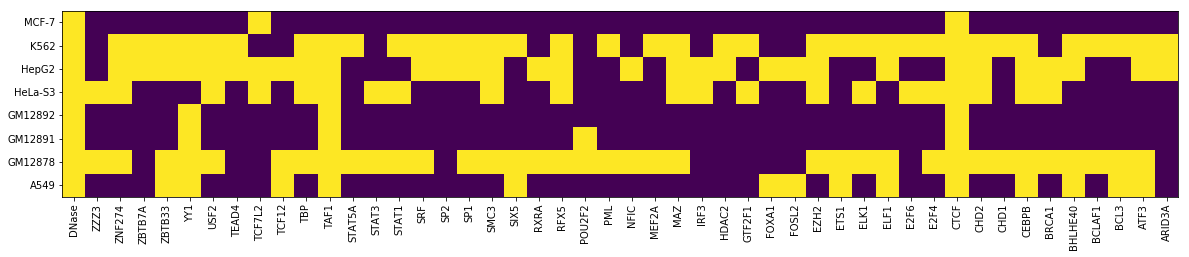

In [8]:
# train_data, valid_data, test_data = load_epitome_data(config['epitome_data_dir'])
dtrain_data, dvalid_data, dtest_data = load_deepsea_label_data(config["deepsea_data_path"])
ddata = {Dataset.TRAIN: dtrain_data, Dataset.VALID: dvalid_data, Dataset.TEST: dtest_data}
print(ddata[Dataset.TRAIN].shape, ddata[Dataset.VALID].shape, ddata[Dataset.TEST].shape)

dmatrix, dcellmap, dassaymap = get_assays_from_feature_file(DEEPSEA_FEATURE_NAME_FILE,
                                  eligible_assays = assays,
                                  eligible_cells = cells, min_cells_per_assay = 2, min_assays_per_cell=2)


fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.xticks(np.arange(len(dassaymap)), rotation = 90)
ax.set_xticklabels(dassaymap.keys())
plt.yticks(np.arange(len(dcellmap)))
ax.set_yticklabels(dcellmap.keys())

plt.imshow(dmatrix!=-1)

# Run the Model

In [10]:
import multiprocessing
test_celltypes = ['A549'] # most available cell types

model = MLP(data,
            test_celltypes,
            matrix,
            assaymap,
            cellmap,
            shuffle_size=2, 
            batch_size=64)
        
model.train(10)
model.score_peak_file("/home/eecs/akmorrow/epitome/data/test.bed")

eval cell types ['MCF-7', 'K562', 'HepG2', 'HeLa-S3', 'GM12892', 'GM12891', 'GM12878']


W0820 17:58:22.328204 140552413628160 deprecation.py:323] From /data/miniconda3/envs/EpitomeEnv_c76/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:505: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
I0820 17:58:22.404129 140552413628160 models.py:2

using ['MCF-7', 'K562', 'HepG2', 'HeLa-S3', 'GM12892', 'GM12891', 'GM12878'] as labels for mode Dataset.TRAIN
using ['MCF-7', 'K562', 'HepG2', 'HeLa-S3', 'GM12892', 'GM12891', 'GM12878'] as labels for mode Dataset.VALID
using ['A549'] as labels for mode Dataset.TEST


W0820 17:58:23.189726 140552413628160 deprecation.py:323] From /data/miniconda3/envs/EpitomeEnv_c76/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:182: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
I0820 17:58:24.955251 140552413628160 models.py:229] 0 tf.Tensor(0.015092659, shape=(), dtype=float32)


finished loading peak file
using ['PLACEHOLDER_CELL'] as labels for mode Dataset.RUNTIME
finished predictions... (76, 47)


,0,1,2,ZZZ3,ZNF274,ZBTB7A,ZBTB33,YY1,USF2,TEAD4,...,CTCF,CHD2,CHD1,CEBPB,BRCA1,BHLHE40,BCLAF1,BCL3,ATF3,ARID3A
0,chr1,10000,10200,0.424016,0.504900,0.394414,0.446403,0.287555,0.337119,0.529026,...,0.513821,0.451943,0.288074,0.368658,0.340147,0.453083,0.330699,0.364183,0.378475,0.331865
1,chr1,10200,10400,0.422160,0.503951,0.380988,0.443555,0.275168,0.333318,0.528230,...,0.512320,0.444512,0.285414,0.360140,0.335121,0.449020,0.327338,0.360664,0.377822,0.326246
2,chr1,10400,10600,0.415189,0.484452,0.379412,0.417576,0.262246,0.343396,0.513205,...,0.524610,0.426380,0.284487,0.345338,0.324111,0.455057,0.320581,0.358143,0.381050,0.327770
3,chr1,16000,16200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,chr1,16200,16400,0.423424,0.501764,0.386262,0.402822,0.258846,0.342693,0.495557,...,0.532990,0.411268,0.299062,0.356412,0.333977,0.474706,0.322115,0.349800,0.404927,0.312507
5,chr1,29000,29200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,chr1,29200,29400,0.403173,0.476017,0.404744,0.399687,0.265011,0.343614,0.509676,...,0.525052,0.411659,0.283998,0.344506,0.324699,0.467087,0.318728,0.359237,0.384393,0.301244
7,chr1,29400,29600,0.398596,0.466693,0.422562,0.388327,0.261976,0.342864,0.514165,...,0.535380,0.402578,0.268821,0.343134,0.321795,0.469343,0.309765,0.357304,0.368213,0.292066
8,chr1,29600,29800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,chr1,89600,89800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
from epitome.models import *
test_celltypes = ['A549'] # most available cell types

model2 = MLP(ddata,
            test_celltypes,
            dmatrix,
            dassaymap,
            dcellmap,
            shuffle_size=2, 
            batch_size=64)
        
model2.train(3000)
model.score_peak_file("/home/eecs/akmorrow/epitome/data/test.bed")

eval cell types ['MCF-7', 'K562', 'HepG2', 'HeLa-S3', 'GM12892', 'GM12891', 'GM12878']


KeyboardInterrupt: 

In [106]:
test_celltypes = ['A549'] # most available cell types

model = MLP(data,
            test_celltypes,
            matrix,
            assaymap,
            cellmap,
            shuffle_size=2, 
            batch_size=64)
        
model.train(100)

model.score_peak_file("/home/eecs/akmorrow/epitome/data/test.bed")

eval cell types ['MCF-7', 'K562', 'HepG2', 'HeLa-S3', 'GM12892', 'GM12891', 'GM12878']


I0820 17:44:15.575316 139773160908544 <ipython-input-105-e0f70f1a0709>:210] Starting Training


using ['MCF-7', 'K562', 'HepG2', 'HeLa-S3', 'GM12892', 'GM12891', 'GM12878'] as labels for mode Dataset.TRAIN
using ['MCF-7', 'K562', 'HepG2', 'HeLa-S3', 'GM12892', 'GM12891', 'GM12878'] as labels for mode Dataset.VALID
using ['A549'] as labels for mode Dataset.TEST


I0820 17:44:17.876848 139773160908544 <ipython-input-105-e0f70f1a0709>:229] 0 tf.Tensor(0.014676229, shape=(), dtype=float32)


finished loading peak file
using ['PLACEHOLDER_CELL'] as labels for mode Dataset.RUNTIME
finished predictions... (76, 47)


,0,1,2,ZZZ3,ZNF274,ZBTB7A,ZBTB33,YY1,USF2,TEAD4,...,CTCF,CHD2,CHD1,CEBPB,BRCA1,BHLHE40,BCLAF1,BCL3,ATF3,ARID3A
0,chr1,10000,10200,0.034505,0.054529,0.119984,0.034152,0.064563,0.023809,0.045283,...,0.060080,0.050960,0.053581,0.020993,0.026103,0.072082,0.016108,0.061279,0.041749,0.020739
1,chr1,10200,10400,0.034072,0.054005,0.119838,0.034016,0.064355,0.023633,0.044943,...,0.059661,0.050757,0.053135,0.020837,0.025785,0.071619,0.016003,0.060922,0.041547,0.020648
2,chr1,10400,10600,0.033465,0.053208,0.119845,0.033942,0.064068,0.023343,0.044507,...,0.059224,0.050624,0.052398,0.020656,0.025379,0.070982,0.015950,0.060349,0.041406,0.020489
3,chr1,16000,16200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,chr1,16200,16400,0.033311,0.053016,0.120207,0.033962,0.064154,0.023268,0.044390,...,0.059282,0.050663,0.052099,0.020597,0.025290,0.070937,0.015980,0.060267,0.041533,0.020480
5,chr1,29000,29200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,chr1,29200,29400,0.033406,0.053014,0.119970,0.033864,0.064256,0.023351,0.044498,...,0.059324,0.050802,0.052436,0.020573,0.025344,0.071184,0.015968,0.060514,0.041450,0.020515
7,chr1,29400,29600,0.033214,0.052710,0.119916,0.033768,0.064290,0.023301,0.044353,...,0.059226,0.050859,0.052263,0.020471,0.025207,0.071112,0.015945,0.060465,0.041414,0.020486
8,chr1,29600,29800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,chr1,89600,89800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [61]:
from epitome.generators import *
_, g = generator_to_tf_dataset(load_data(data[Dataset.VALID], 
                                               model.eval_cell_types, 
                                               model.eval_cell_types,
                                               model.matrix,
                                               model.assaymap,
                                               model.cellmap,
                                               radii = model.radii, mode = Dataset.VALID),
                                               model.batch_size, 1, model.prefetch_size)
results2_epitome = model2.test_from_generator(4000 * len(model2.eval_cell_types), g)


_, g = generator_to_tf_dataset(load_data(data[Dataset.VALID], 
                                               model.eval_cell_types, 
                                               model.eval_cell_types,
                                               model.matrix,
                                               model.assaymap,
                                               model.cellmap,
                                               radii = model.radii, mode = Dataset.VALID),
                                               model.batch_size, 1, model.prefetch_size)
results_original_epitome = model.test_from_generator(4000 * len(model.eval_cell_types), g)




using ['MCF-7', 'K562', 'HepG2', 'HeLa-S3', 'GM12892', 'GM12891', 'GM12878'] as labels for mode Dataset.VALID


I0820 16:36:13.527257 139773160908544 models.py:378] macro auROC:     0.8805576379320518
I0820 16:36:13.529829 139773160908544 models.py:379] auPRC:     0.15033279295223598
I0820 16:36:13.530861 139773160908544 models.py:380] GINI:     0.7294746607827168


using ['MCF-7', 'K562', 'HepG2', 'HeLa-S3', 'GM12892', 'GM12891', 'GM12878'] as labels for mode Dataset.VALID


I0820 16:36:59.752456 139773160908544 <ipython-input-56-973baee2c367>:354] macro auROC:     0.8818726761220181
I0820 16:36:59.753438 139773160908544 <ipython-input-56-973baee2c367>:355] auPRC:     0.21462248760872105
I0820 16:36:59.754131 139773160908544 <ipython-input-56-973baee2c367>:356] GINI:     0.6502819533869264


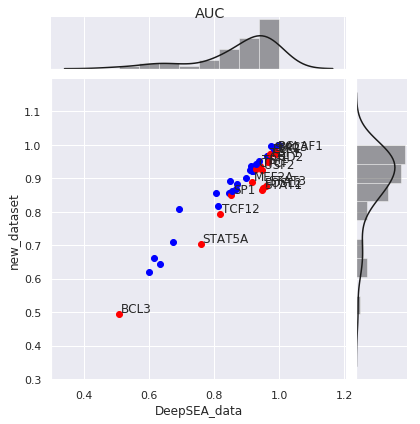

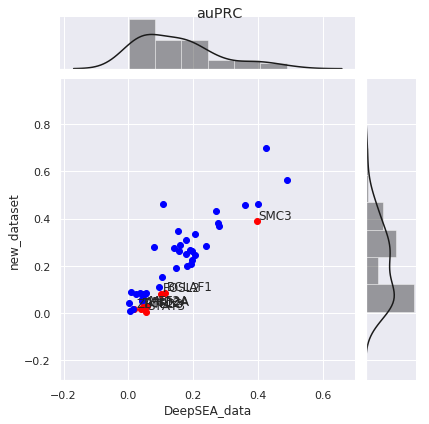

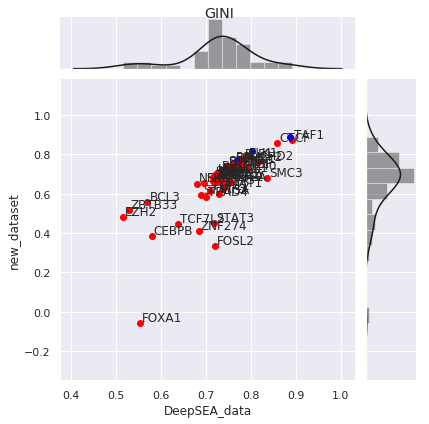

In [62]:

from epitome.viz import *
for i in results2_epitome [3]["CTCF"].keys():
    joint_plot(results2_epitome [3], results_original_epitome[3],
               metric = i,
               model1_name = "DeepSEA_data", 
               model2_name = "new_dataset",
                outlier_filter = 'new_dataset < DeepSEA_data')

# look for correlation between cell type counts and performace

In [28]:
matrix2 = np.copy(matrix)
# remove test celltypes
matrix2 = np.delete(matrix2, cellmap[test_celltypes[0]], 0)
matrix3 = np.copy(matrix)
matrix3 = np.delete(matrix3, cellmap[test_celltypes[0]], 0)

In [29]:


matrix2[matrix2 >= 0]  = 1
matrix2[matrix2 == -1]  = 0
tmp = np.sum(matrix2, axis=0)

/data/akmorrow/miniconda3/envs/EpitomeEnv/lib/python3.6/site-packages/matplotlib/text.py:2148: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


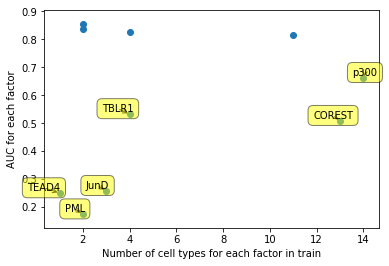

In [32]:
t = [(k, v['AUC']) for (k, v) in assay_dict.items()]
zipped = zip(tmp, t)

k = list(filter(lambda x: not np.isnan(x[1][1]),  zipped))

x = list(map(lambda x: x[0], k))
y = list(map(lambda x: x[1][1], k))


fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel('Number of cell types for each factor in train')
ax.set_ylabel('AUC for each factor')

for i, txt in enumerate(k):
    label = txt[1][0]
    if (y[i] < 0.7):
        ax.annotate(label, (x[i], y[i]),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))



In [107]:
# for each assay, count positives in train
results_dict = {}


for (assay, res) in assay_dict.items():
    if (not np.isnan(res['AUC'])):
        x = matrix3[:,assaymap[assay]]
        filtered = x[np.where(x >= 0)[0]]

        sum_ = np.sum(train_data["y"][filtered,:])
        results_dict[assay] = (sum_, res['AUC'])




In [108]:
macroAUC

0.8608675037689738

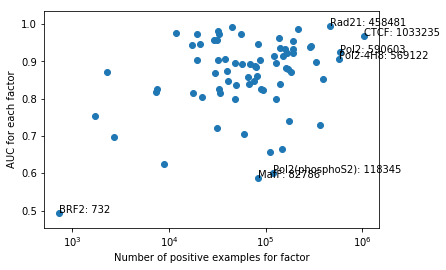

In [109]:

x = [v[0] for (k, v) in results_dict.items()]
y = [v[1] for (k, v) in results_dict.items()]

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel('Number of positive examples for factor')
ax.set_ylabel('AUC for each factor')
ax.set_xscale('symlog')

for i, txt in enumerate(results_dict.items()):
    label = txt[0]
    if (y[i] < 0.6 or x[i]>400000):
        ax.annotate("%s: %i" % (label, x[i]), (x[i], y[i]),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# Results

- 96 TFs test GM12878 0.8819470290234287
- 96 TFS test K562    0.8340156671491048
- 96 TFS test K562 with filtering 0.7928056830435212
- 96 TFS test K562 (One hot encoding) 0.8608675037689738 (seems to help some)



Does it help to use "one hot" encoding? (yes)
Remove TFs with too few positives

In [983]:
model.save("/data/akmorrow/epitome_data/saved_models/test_model_full_2.ckpt")


INFO:tensorflow:Model saved in path: /data/akmorrow/epitome_data/saved_models/test_model_full_2.ckpt


# Restore Model

In [12]:

model  = MLP(4, [100, 100, 100, 50], 
            tf.tanh, 
            train_data, 
            valid_data, 
            test_data, 
            [],
            gen_from_peaks, 
            matrix,
            assaymap,
            cellmap,
            shuffle_size=2, 
            radii=[1,3,10,30])

model.restore('/data/akmorrow/epitome_data/saved_models/model__2019_04_01__14_48.ckpt')


eval cell types ['T-47D', 'SK-N-SH_RA', 'PANC-1', 'NB4', 'MCF-7', 'K562', 'HepG2', 'HeLa-S3', 'HUVEC', 'HCT-116', 'H1-hESC', 'GM12892', 'GM12891', 'GM12878', 'A549']
using ['T-47D', 'SK-N-SH_RA', 'PANC-1', 'NB4', 'MCF-7', 'K562', 'HepG2', 'HeLa-S3', 'HUVEC', 'HCT-116', 'H1-hESC', 'GM12892', 'GM12891', 'GM12878', 'A549'] as labels for mode Dataset.TRAIN
using ['T-47D', 'SK-N-SH_RA', 'PANC-1', 'NB4', 'MCF-7', 'K562', 'HepG2', 'HeLa-S3', 'HUVEC', 'HCT-116', 'H1-hESC', 'GM12892', 'GM12891', 'GM12878', 'A549'] as labels for mode Dataset.VALID
using [] as labels for mode Dataset.TEST
Error: no data, local variable 'x' referenced before assignment
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Initializing variables
INFO:tensorflow:Starting Training
INFO:tensorflow:Restoring parameters from /data/akmorrow/epitome_data/saved_models/model__2019_04_01__14_48.ckpt
INFO:tensorflow:Starting Training


In [25]:

# load in all cell types for evaluation (64 cell types)
all_matrix, all_cellmap, all_assaymap = get_assays_from_feature_file(feature_path=feature_path,eligible_assays = list(assaymap),
                                  eligible_cells = None, min_cells_per_assay = 2, min_assays_per_cell=2)


In [29]:
test_celltype = "A549"

eval_cell_types = list(cellmap).copy()

# if test_celltype is in eval_cell_types, replace it with something else
if (test_celltype in eval_cell_types):
    if (test_celltype == "PANC-1"):
        new_eval_celltype = "NT2-D1" # TODO AM 4/1/2019 maybe don't hardcode
    else:
        new_eval_celltype = "PANC-1" # TODO AM 4/1/2019 maybe don't hardcode

    print("removing %s from eval_celltypes and replacing with %s" % (test_celltype, new_eval_celltype))
    eval_cell_types.remove(test_celltype)
    eval_cell_types.append(new_eval_celltype)

_, iter_ = generator_to_one_shot_iterator(gen_from_peaks(test_data, 
                                               [test_celltype], 
                                               eval_cell_types,
                                               all_matrix,
                                               assaymap,
                                               all_cellmap,
                                               radii = model.radii, mode = Dataset.TEST),
                                                   model.batch_size, 1, model.prefetch_size)



removing A549 from eval_celltypes and replacing with PANC-1
using ['A549'] as labels for mode Dataset.TEST
INFO:tensorflow:Our macro AUC:     0.8893307231702967
INFO:tensorflow:Our micro AUC:     0.8893307231702967


ValueError: not enough values to unpack (expected 6, got 5)

In [88]:

preds, truth, assay_dict, microAUC, macroAUC = model.test_from_generator(test_data["y"].shape[1], iter_, log=True)


INFO:tensorflow:Our macro AUC:     0.8893293427337742
INFO:tensorflow:Our micro AUC:     0.8893293427337742


In [76]:
def bin_total(y_true, y_prob, n_bins):
    bins = np.linspace(0., 1. + 1e-8, n_bins + 1)

    # In sklearn.calibration.calibration_curve,
    # the last value in the array is always 0.
    binids = np.digitize(y_prob, bins) - 1

    return np.bincount(binids, minlength=len(bins))


In [71]:
list_assaymap = list(assaymap)

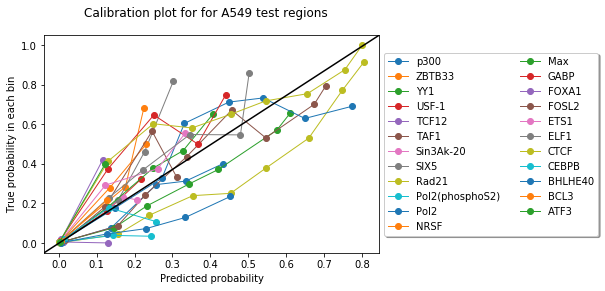

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
# only these two lines are calibration curves
for i in range(truth.shape[1]):
    logreg_y, logreg_x = calibration_curve(truth[:,i], preds[:,i], n_bins=10)
 
    if (not np.isnan(assay_dict[list_assaymap[i+1]]["AUC"])): # test cell type does not have all factors!
        plt.plot(logreg_x,logreg_y, marker='o', linewidth=1, label=list_assaymap[i+1])

        
# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for for A549 test regions')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=2, fancybox=True, shadow=True)

plt.show()